In [1]:
import pandas as pd
import time
directory = "../Data/HDF5/FxTickData.h5"
df = pd.read_hdf(directory)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25132943 entries, 2020-01-12 22:00:00.499000 to 2020-02-07 21:58:54.753000
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 575.2 MB


In [2]:
print(type(df.index))
#df.index = pd.to_datetime(df.index)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [3]:
df = df.sort_index()

In [4]:
#df["date"] = df.index.date

In [4]:
df.head(n=10)

,Bid,Ask
DateTime,,
2020-01-05 22:02:02.577,1.04218,1.04281
2020-01-05 22:03:12.557,1.04223,1.04282
2020-01-05 22:03:12.907,1.04218,1.04282
2020-01-05 22:03:16.232,1.04218,1.04278
2020-01-05 22:03:23.582,1.04218,1.04281
2020-01-05 22:03:24.084,1.04218,1.04274
2020-01-05 22:03:31.032,1.04218,1.04281
2020-01-05 22:03:42.032,1.04203,1.04281
2020-01-05 22:03:43.057,1.04208,1.04281


In [5]:
import datetime
#df.loc[datetime.date(year=2020,month=1,day=9):datetime.date(year=2020,month=1,day=9)]
print(df.loc['2020-1-9':'2020-1-9'])
#print example of one day of prices

                             Bid      Ask
DateTime                                 
2020-01-09 00:00:00.511  1.03325  1.03331
2020-01-09 00:00:00.934  1.03325  1.03330
2020-01-09 00:00:00.941  1.03321  1.03330
2020-01-09 00:00:01.188  1.03323  1.03330
2020-01-09 00:00:01.201  1.03323  1.03329
...                          ...      ...
2020-01-09 23:59:56.522  1.03726  1.03735
2020-01-09 23:59:56.697  1.03726  1.03732
2020-01-09 23:59:56.918  1.03726  1.03733
2020-01-09 23:59:56.956  1.03727  1.03733
2020-01-09 23:59:58.736  1.03727  1.03735

[142911 rows x 2 columns]


In [6]:
#df['spread'] = df.apply(lambda row: ((row.Ask / row.Bid)-1)*1000000, axis=1)
#start_time = time.time()
# calculate mid prices
#df['mid'] = df.apply(lambda row: ((row.Ask + row.Bid) / 2), axis=1)
#print("--- %s seconds ---" % (time.time() - start_time))

###### -----> lambda in this case is super slow and takes about 1150 seconds vs
###### -----> vs 7 seconds for the version below

start_time = time.time()
# calculate mid prices
sum_column = (df["Bid"] + df["Ask"])/2
df["mid"] = sum_column
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6956038475036621 seconds ---


In [7]:
print(df.loc['2020-1-23'])
# print example date

                             Bid      Ask       mid
DateTime                                           
2020-01-23 00:00:00.039  1.03739  1.03747  1.037430
2020-01-23 00:00:00.055  1.03735  1.03747  1.037410
2020-01-23 00:00:00.164  1.03735  1.03745  1.037400
2020-01-23 00:00:00.342  1.03735  1.03747  1.037410
2020-01-23 00:00:00.345  1.03736  1.03747  1.037415
...                          ...      ...       ...
2020-01-23 23:59:59.794  1.03475  1.03484  1.034795
2020-01-23 23:59:59.833  1.03475  1.03485  1.034800
2020-01-23 23:59:59.900  1.03475  1.03484  1.034795
2020-01-23 23:59:59.915  1.03475  1.03480  1.034775
2020-01-23 23:59:59.934  1.03474  1.03484  1.034790

[200694 rows x 3 columns]


In [8]:
# drop columns to leave only mid
df = df.drop('Bid', 1)
df = df.drop('Ask', 1)

In [9]:
df.head(n=10)

,mid
DateTime,
2020-01-05 22:02:02.577,1.042495
2020-01-05 22:03:12.557,1.042525
2020-01-05 22:03:12.907,1.042500
2020-01-05 22:03:16.232,1.042480
2020-01-05 22:03:23.582,1.042495
2020-01-05 22:03:24.084,1.042460
2020-01-05 22:03:31.032,1.042495
2020-01-05 22:03:42.032,1.042420
2020-01-05 22:03:43.057,1.042445


In [10]:
ohlc = df.resample('D').ohlc()
ohlc.head()

mid                              
                open      high       low     close
DateTime                                          
2020-01-05  1.042495  1.043540  1.042085  1.043485
2020-01-06  1.043480  1.044105  1.039325  1.040300
2020-01-07  1.040310  1.041020  1.033280  1.034515
2020-01-08  1.034525  1.036150  1.031585  1.033275
2020-01-09  1.033280  1.038605  1.032735  1.037310

In [11]:
ohlc = ohlc.drop(('mid', 'open'), 1)
ohlc = ohlc.drop(('mid', 'high'), 1)
ohlc = ohlc.drop(('mid', 'low'), 1)
ohlc.head()

,mid
,close
DateTime,
2020-01-05,1.043485
2020-01-06,1.040300
2020-01-07,1.034515
2020-01-08,1.033275
2020-01-09,1.037310


In [12]:
daily_return = ohlc.pct_change(1)
# df.shift(1) / df - 1
# prices[:-1] / prices[1:].values - 1
daily_return.head()

,mid
,close
DateTime,
2020-01-05,NaN
2020-01-06,-0.003052
2020-01-07,-0.005561
2020-01-08,-0.001199
2020-01-09,0.003905


In [13]:
daily_return.head()

,mid
,close
DateTime,
2020-01-05,NaN
2020-01-06,-0.003052
2020-01-07,-0.005561
2020-01-08,-0.001199
2020-01-09,0.003905


In [14]:
daily_return.describe()

,mid
,close
count,61.000000
mean,0.000036
std,0.002360
min,-0.007027
25%,-0.001170
50%,0.000000
75%,0.001491
max,0.004644


<AxesSubplot:xlabel='DateTime'>

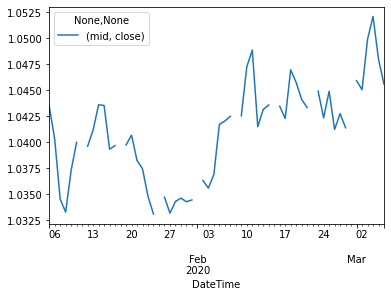

In [16]:
# plot ohlc data
ohlc.plot(y=('mid', 'close'))

In [17]:
ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2020-01-05 to 2020-03-06
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (mid, close)  54 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


<AxesSubplot:xlabel='DateTime'>

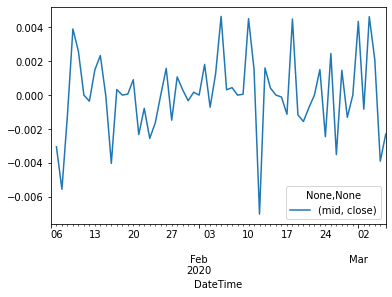

In [18]:
# plot daily returns
daily_return.plot(y=('mid', 'close'))

In [19]:
# get specific date range
print(ohlc.loc['2020-1-9':'2020-1-22'])

                 mid
               close
DateTime            
2020-01-09  1.037310
2020-01-10  1.039990
2020-01-11       NaN
2020-01-12  1.039615
2020-01-13  1.041165
2020-01-14  1.043595
2020-01-15  1.043535
2020-01-16  1.039330
2020-01-17  1.039670
2020-01-18       NaN
2020-01-19  1.039730
2020-01-20  1.040675
2020-01-21  1.038250
2020-01-22  1.037440


In [23]:
# get specific datapoint
ohlc.loc['2020-1-9', ('mid', 'close')]

1.03731

In [22]:
new_day = df.loc['2020-1-23':'2020-1-27']
new_day

,mid
DateTime,
2020-01-23 00:00:00.039,1.037430
2020-01-23 00:00:00.055,1.037410
2020-01-23 00:00:00.164,1.037400
2020-01-23 00:00:00.342,1.037410
2020-01-23 00:00:00.345,1.037415
...,...
2020-01-27 23:59:48.755,1.033175
2020-01-27 23:59:48.756,1.033180
2020-01-27 23:59:56.416,1.033175


<AxesSubplot:xlabel='DateTime'>

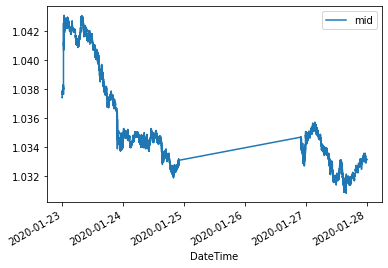

In [25]:
new_day.plot(y='mid')

In [14]:
directory = "../Data/Pickles/result.pkl"
df_from_pickle = pd.read_pickle(directory)
df_from_pickle

,time,pnl,pos,price
0,2020-01-23 00:00:00.039,0.000000,0.000000,1.037430
1,2020-01-23 00:00:00.055,0.000000,0.000000,1.037410
2,2020-01-23 00:00:00.164,0.000000,0.000000,1.037400
3,2020-01-23 00:00:00.342,0.000000,0.000000,1.037410
4,2020-01-23 00:00:00.345,0.000000,0.000000,1.037415
...,...,...,...,...
200689,2020-01-23 23:59:59.794,201.814071,20000.183789,1.034795
200690,2020-01-23 23:59:59.833,201.910709,20000.090243,1.034800
200691,2020-01-23 23:59:59.900,201.814072,19999.900223,1.034795
200692,2020-01-23 23:59:59.915,201.427524,19999.616922,1.034775


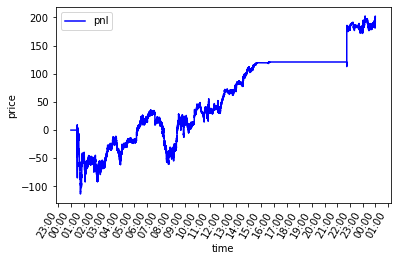

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

df_from_pickle.plot(kind='line',x='time',y='pnl',color='blue')
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 60)
plt.xlabel("time")
plt.ylabel("price")
plt.gca().xaxis.set_major_locator(md.MinuteLocator(byminute = [0]))
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

#df_from_pickle.plot(x='time', y='price')

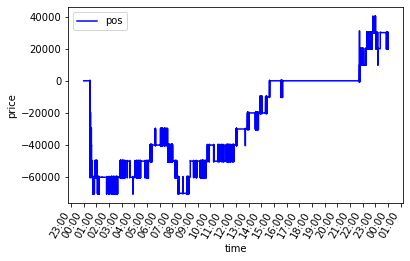

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

df_from_pickle.plot(kind='line',x='time',y='pos',color='blue')
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 60)
plt.xlabel("time")
plt.ylabel("price")
plt.gca().xaxis.set_major_locator(md.MinuteLocator(byminute = [0]))
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

#df_from_pickle.plot(x='time', y='price')

In [36]:
type(df_from_pickle.index)

pandas.core.indexes.range.RangeIndex